In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import numpy as np
from math import sqrt

## Линейная модель без регуляризации

In [6]:
lr = LinearRegression().fit(X_train, y_train)

In [7]:
y_pred = lr.predict(X_test)
y_pred

array([426.63926549, 533.34325701, 592.57061934, ..., 279.28576365,
       729.47140001, 701.16159161])

In [8]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lr.score(X_test, y_test)}')

MAE: 216.35432304282807
MSE: 83122.50894316925
RMSE: 288.3097447939789
MAPE: 0.533728031530908
R^2: 0.49544733049286616


In [9]:
lr.coef_

array([ 2.11570620e+00,  7.90841717e+02,  3.69518390e+02, -7.79461867e+02,
       -1.14307151e+03, -1.03827117e+01,  9.99677570e+00,  3.73970869e+00,
        1.80324741e+04,  4.02194806e-01, -4.02194806e-01])

## Lasso regression

In [10]:
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lasso.score(X_test, y_test)}')
lasso.coef_

MAE: 217.33248669979648
MSE: 83328.77382698382
RMSE: 288.6672371901318
MAPE: 0.5443033790793248
R^2: 0.4941953050297587


array([ 2.02020305e+00,  2.50139951e+02,  1.12057798e+02, -2.34190366e+02,
       -9.45197778e+02, -1.03327243e+01,  9.99671569e+00,  3.73801732e+00,
        1.75104306e+04,  2.84170419e-01, -0.00000000e+00])

## Ridge regression

In [11]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {ridge.score(X_test, y_test)}')
ridge.coef_

MAE: 216.43865521215633
MSE: 83124.67670812475
RMSE: 288.3135042070086
MAPE: 0.5349678506915653
R^2: 0.4954341721846165


array([ 2.11826374e+00,  7.77733362e+02,  3.70223789e+02, -7.66018045e+02,
       -1.14677293e+03, -1.03683796e+01,  1.00030266e+01,  3.73847135e+00,
        1.79728610e+04,  4.02951113e-01, -4.02951113e-01])

## GridSearch

In [12]:
parameters = {'alpha': np.arange(0.1, 1, 0.1)}

In [13]:
lasso_optimal = GridSearchCV(Lasso(), parameters, n_jobs=-1).fit(X_train, y_train)
lasso_optimal.best_params_

{'alpha': np.float64(0.8)}

In [14]:
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': np.float64(0.9)}

## RandomizedSearch

In [15]:
lasso_optimal = RandomizedSearchCV(Lasso(), parameters, n_jobs=-1).fit(X_train, y_train)
lasso_optimal.best_params_

D:\MachineLearning\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'alpha': np.float64(0.8)}

In [16]:
ridge_optimal = RandomizedSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

D:\MachineLearning\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'alpha': np.float64(0.9)}

## Polynomial regression

In [17]:
y = df['trip_duration']
X = df.drop(['trip_duration'], axis=1)
pf = PolynomialFeatures(2)
X = pf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
pr = LinearRegression().fit(X_train, y_train)

In [18]:
df.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_day,trip_month,trip_hour,distance,trip_duration,vendor_id_1,vendor_id_2
0,1,-73.953918,40.778873,-73.963875,40.771164,1,2,16,0.012592,400,0,1
1,2,-73.988312,40.731743,-73.994751,40.694931,5,3,23,0.037371,1100,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,7,2,17,0.072712,1635,0,1
3,6,-73.961670,40.759720,-73.956779,40.780628,2,1,9,0.021473,1141,0,1
4,1,-74.017120,40.708469,-73.988182,40.740631,3,2,6,0.043264,848,1,0


In [19]:
y_pred = pr.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pr.score(X_test, y_test)}')

MAE: 194.36033153968611
MSE: 68566.63901515023
RMSE: 261.8523229134128
MAPE: 0.4214083933320818
R^2: 0.5831977858069037


# Признаки закодированы с помощью one-hot

In [20]:
df2 = pd.read_csv(r"D:\MachineLearning\data\trip_duration_processed_dummies.csv")

In [21]:
df2 = df2.drop(['Unnamed: 0', 'passenger_count'], axis=1)

In [22]:
df2.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,trip_duration,vendor_id_1,vendor_id_2,trip_day_1,trip_day_2,...,trip_hour_14,trip_hour_15,trip_hour_16,trip_hour_17,trip_hour_18,trip_hour_19,trip_hour_20,trip_hour_21,trip_hour_22,trip_hour_23
0,-73.953918,40.778873,-73.963875,40.771164,0.012592,400,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,-73.988312,40.731743,-73.994751,40.694931,0.037371,1100,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-73.997314,40.721458,-73.948029,40.774918,0.072712,1635,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-73.961670,40.759720,-73.956779,40.780628,0.021473,1141,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-74.017120,40.708469,-73.988182,40.740631,0.043264,848,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y = df2['trip_duration']
X = df2.drop(['trip_duration'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, shuffle=True)

## Линейная модель без регуляризации

In [24]:
lr2 = LinearRegression().fit(X_train, y_train)

In [25]:
y_pred = lr2.predict(X_test)
y_pred

array([622.14297518, 578.88489468, 589.61246522, ..., 383.63770056,
       965.67636933, 501.1726395 ])

In [26]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lr2.score(X_test, y_test)}')

MAE: 199.80749742984366
MSE: 85368.79535788247
RMSE: 292.17938900251414
MAPE: 0.47910421714118573
R^2: 0.48142132203932186


In [27]:
lr2.coef_

array([-6.54349007e+02,  4.52124046e+02, -1.03485443e+03, -1.15584400e+03,
        1.91399920e+04,  6.57600856e-02, -6.57600855e-02, -3.76020544e+01,
        2.63840772e+01,  4.29596499e+01,  4.38798974e+01,  3.14597478e+01,
       -2.40405713e+01, -8.30407466e+01, -2.40352318e+01, -1.53698738e+01,
       -1.56981434e+01,  1.20820170e+01,  1.94467145e+01,  2.35745175e+01,
       -7.76523229e+01, -1.12014508e+02, -1.32569811e+02, -1.63203571e+02,
       -1.90157693e+02, -2.47392370e+02, -1.95905794e+02, -5.05364435e+01,
        7.39126387e+01,  9.84321141e+01,  1.08131458e+02,  1.27000922e+02,
        1.35629588e+02,  1.29468817e+02,  1.38298119e+02,  1.33530261e+02,
        1.09924874e+02,  1.10294428e+02,  1.00921920e+02,  3.65993257e+01,
       -9.23504319e+00, -3.43270266e+01, -3.11282288e+01, -5.80216539e+01])

## Lasso regression

In [28]:
lasso2 = Lasso(alpha=0.1).fit(X_train, y_train)
y_pred = lasso2.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lasso2.score(X_test, y_test)}')
lasso2.coef_

MAE: 200.26228868539116
MSE: 81306.3694335932
RMSE: 285.14271765835645
MAPE: 0.4856079987484276
R^2: 0.506098810532623


array([-2.96572817e+02,  0.00000000e+00, -1.08971694e+03, -8.11172512e+02,
        1.86838726e+04,  0.00000000e+00, -0.00000000e+00, -6.28135341e+01,
        0.00000000e+00,  1.59625558e+01,  1.67422464e+01,  4.28348783e+00,
       -4.97030817e+01, -1.08752342e+02, -3.47574161e+01, -2.61137742e+01,
       -2.63547571e+01,  2.24017899e-01,  7.30910679e+00,  1.14829116e+01,
       -1.07918711e+02, -1.41822225e+02, -1.60761848e+02, -1.89156571e+02,
       -2.13425721e+02, -2.70731275e+02, -2.26336863e+02, -8.36735964e+01,
        3.59076536e+01,  6.05521750e+01,  7.00574050e+01,  8.89213247e+01,
        9.75009316e+01,  9.12359684e+01,  1.00177145e+02,  9.47767983e+01,
        7.12041717e+01,  7.23513923e+01,  6.36277036e+01,  0.00000000e+00,
       -4.17764101e+01, -6.66898406e+01, -6.29703797e+01, -8.93350053e+01])

## Ridge regression

In [29]:
ridge2 = Ridge(alpha=0.1).fit(X_train, y_train)
y_pred = ridge2.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {ridge2.score(X_test, y_test)}')
ridge2.coef_

MAE: 199.86371636519084
MSE: 85257.62440292595
RMSE: 291.98908267763363
MAPE: 0.4800327307909149
R^2: 0.4820966377282371


array([-6.59365468e+02,  4.49866774e+02, -1.02235655e+03, -1.15884359e+03,
        1.90749388e+04,  6.24491215e-02, -6.24491195e-02, -3.76024741e+01,
        2.63554740e+01,  4.29402280e+01,  4.38559008e+01,  3.14381271e+01,
       -2.40016791e+01, -8.29855767e+01, -2.40448387e+01, -1.53783784e+01,
       -1.56934299e+01,  1.20949518e+01,  1.94508070e+01,  2.35708882e+01,
       -7.74691913e+01, -1.11864790e+02, -1.32415973e+02, -1.63005970e+02,
       -1.89915509e+02, -2.47223707e+02, -1.95847029e+02, -5.05453740e+01,
        7.38232716e+01,  9.83091354e+01,  1.08010901e+02,  1.26863323e+02,
        1.35466659e+02,  1.29317714e+02,  1.38162317e+02,  1.33347075e+02,
        1.09768534e+02,  1.10177273e+02,  1.00815509e+02,  3.65430797e+01,
       -9.19434079e+00, -3.42430955e+01, -3.10119154e+01, -5.78678948e+01])

# Полиномиальная регрессия с одним признаком

In [34]:
y = df2['trip_duration'].values.reshape(-1, 1)
X_old = df2['distance'].values.reshape(-1, 1)
pf = PolynomialFeatures(2)
X = pf.fit_transform(X_old)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
pr2 = LinearRegression().fit(X_train, y_train)

In [35]:
df2.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,trip_duration,vendor_id_1,vendor_id_2,trip_day_1,trip_day_2,...,trip_hour_14,trip_hour_15,trip_hour_16,trip_hour_17,trip_hour_18,trip_hour_19,trip_hour_20,trip_hour_21,trip_hour_22,trip_hour_23
0,-73.953918,40.778873,-73.963875,40.771164,0.012592,400,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,-73.988312,40.731743,-73.994751,40.694931,0.037371,1100,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-73.997314,40.721458,-73.948029,40.774918,0.072712,1635,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-73.961670,40.759720,-73.956779,40.780628,0.021473,1141,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-74.017120,40.708469,-73.988182,40.740631,0.043264,848,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y_pred = pr2.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pr2.score(X_test, y_test)}')

MAE: 213.9595869938832
MSE: 81823.37690167049
RMSE: 286.0478577120802
MAPE: 0.4466121750327469
R^2: 0.5031211230883247


In [37]:
pr2.coef_

array([[      0.        ,   31919.29045061, -212598.53671413]])

(128787, 1)


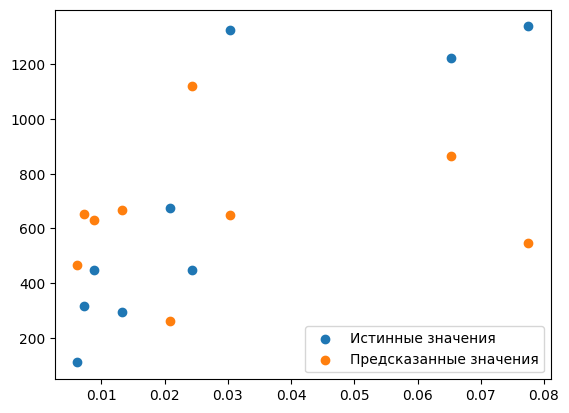

In [38]:
print(y_pred.shape)
fig, ax = plt.subplots()
ax.scatter(X_old[-1:-10:-1], y[-1:-10:-1], label="Истинные значения")
ax.scatter(X_old[-1:-10:-1], y_pred[-1:-10:-1], label="Предсказанные значения")
ax.plot()
ax.legend()
plt.show()

In [105]:
def my_r2_score(y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    return 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

In [106]:
def my_MSE(y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    return np.mean((y - y_pred) ** 2)

In [107]:
def my_RMSE(y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    return np.sqrt(np.mean((y - y_pred) ** 2))

In [108]:
def my_MAE(y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    return np.mean(np.abs(y-y_pred))

In [109]:
def my_MAPE(y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y))

In [110]:
def calc_my_scores(y, y_pred):
    scores = [
        my_MAE(y, y_pred),
        my_MSE(y, y_pred),
        my_RMSE(y, y_pred),
        my_MAPE(y, y_pred),
        my_r2_score(y, y_pred)
    ]
    scores = map(lambda x: round(x, 3), scores)
    return scores

In [111]:
def calc_test_train_my_scores(model):
    y_test_pred = model.predict(X_test)
    test_scores = calc_my_scores(y_test, y_test_pred)
    return test_scores